<a href="https://colab.research.google.com/github/anaconda121/Deep-Learning/blob/main/Tensorflow/Regression_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# required
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# optional
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
tf.random.set_seed(2830)
np.random.seed(2830)

## Section 2

### Part a

In [3]:
gt1_X = np.random.randn(5000, 10)

### Part b

In [4]:
gt1_formula = np.array([5, 7, -2, -8, 6, 0, 0, 0, 0, 0])

### Part c

In [5]:
gt1_y =  gt1_X @ gt1_formula

### Final check

In [6]:
gt1_data = np.concatenate((gt1_y.reshape(len(gt1_y), 1), gt1_X), axis = 1)

In [7]:
gt1 = pd.DataFrame(gt1_data, columns = ["y", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10"])

In [8]:
gt1.head()

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,-29.579884,0.110259,-3.087969,-0.749043,0.741277,-0.680544,1.606849,-0.886237,0.350773,-0.660441,-0.478209
1,-13.763301,-1.569348,-0.457992,-0.842859,-0.553458,-1.470666,0.018171,-0.660271,0.032087,0.230016,0.476304
2,-13.960092,0.509020,-0.130932,-0.276566,0.750972,-1.689004,0.895822,-1.195788,-1.034214,-0.682326,-0.010970
3,15.574768,0.188936,0.191017,-0.021699,-0.974294,0.909203,-0.436864,-0.062763,0.452257,0.365630,2.221494
4,-14.039647,-0.352854,-1.367789,-0.502583,-0.130065,-0.791091,1.052765,-0.617383,1.138698,0.763146,0.712855


## Section 3

### Part a

In [9]:
gt1_model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(1,10)),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear'),
])

### Part b

In [10]:
gt1_model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), loss=tf.keras.losses.MSE)

### Part c

In [11]:
gt1_model1.fit(gt1_X.reshape((len(gt1_X), 1, 10)), gt1_y, batch_size = 64, epochs=100, verbose=2)

Epoch 1/100
79/79 - 1s - loss: 48.5639 - 717ms/epoch - 9ms/step
Epoch 2/100
79/79 - 0s - loss: 1.0388 - 84ms/epoch - 1ms/step
Epoch 3/100
79/79 - 0s - loss: 0.3953 - 90ms/epoch - 1ms/step
Epoch 4/100
79/79 - 0s - loss: 0.1875 - 127ms/epoch - 2ms/step
Epoch 5/100
79/79 - 0s - loss: 0.0978 - 114ms/epoch - 1ms/step
Epoch 6/100
79/79 - 0s - loss: 0.0528 - 110ms/epoch - 1ms/step
Epoch 7/100
79/79 - 0s - loss: 0.0296 - 104ms/epoch - 1ms/step
Epoch 8/100
79/79 - 0s - loss: 0.0173 - 87ms/epoch - 1ms/step
Epoch 9/100
79/79 - 0s - loss: 0.0112 - 91ms/epoch - 1ms/step
Epoch 10/100
79/79 - 0s - loss: 0.0078 - 93ms/epoch - 1ms/step
Epoch 11/100
79/79 - 0s - loss: 0.0053 - 93ms/epoch - 1ms/step
Epoch 12/100
79/79 - 0s - loss: 0.0041 - 92ms/epoch - 1ms/step
Epoch 13/100
79/79 - 0s - loss: 0.0032 - 98ms/epoch - 1ms/step
Epoch 14/100
79/79 - 0s - loss: 0.0028 - 111ms/epoch - 1ms/step
Epoch 15/100
79/79 - 0s - loss: 0.0025 - 102ms/epoch - 1ms/step
Epoch 16/100
79/79 - 0s - loss: 0.0023 - 119ms/epoch - 2

## Section 4

In [12]:
def draw_MLP(layer_sizes, weights=None, inter_neuron_dist=5, inter_layer_dist=30, neuron_radius=0.3,
             neuron_fill=True, neuron_color="black", synapse_colors=["C0", "C0"], line_width_multiplier=0.3,
             first_layer_is_input=True, text_distance=25):
    """Draw a simple MLP network where the synapse strengths are represented as line-widths
    
    Note: If weights is None, each line is drawn with uniform width.
    Note: Default aesthetic values are suited to networks with ~16 neurons in each layer.
    
    params:
        layer_sizes -- list of the # of neurons in each layer (including input and output), e.g. [10, 16, 16, 1]
        weights -- list, containing 2D numpy arrays from a neural net object representing the weights of an MLP
        (aesthetic) inter_neuron_dist -- float, the horizontal distance between neurons in the same layer
        (aesthetic) inter_layer_dist -- float, the verticle distance between layers
        (aesthetic) neuron_radius -- float, neuron radius
        (aesthetic) neuron_fill -- boolean, whether or not to fill the circles representing neurons
        (aesthetic) neuron_color -- str, color of the neurons
        (aesthetic) synapse_colors -- list, colors for the synapses (positive weights get one and negatives another)
        (aesthetic) line_width_multiplier -- float, multiplied with weights to get matplotlib line width
        (aesthetic) first_layer_is_input -- boolean, whether the first layer is input, used only for label drawing
        (aesthetic) text_distance -- int, the distance between the label and the first neuron in each layer
    returns:
        None
    side-effects:
        Displays a matplotlib figure
    """
    # some basic variables
    largest_layer_size = max(layer_sizes)
    previous_layer = {} # stores neuron positions in previous layer for synapse drawing
    current_layer = {}
    current_x = 0
    current_y = 0
    
    # a helper for centering layers
    def get_left_margin(layer_size):
        """Calculate left margin so layer is centered relative to entire graph"""
        return inter_neuron_dist * (largest_layer_size-layer_size) / 2 + text_distance
    
    # start from the first layer
    current_x = get_left_margin(layer_sizes[0])
    
    # draw ONLY the neurons in the first layer
    for neuron_number in range(layer_sizes[0]):
        # use a matplotlib circle to represent each neuron
        circle = plt.Circle((current_x, current_y), radius=neuron_radius, color=neuron_color, fill=neuron_fill)
        plt.gca().add_patch(circle)
        
        previous_layer[neuron_number] = (current_x, current_y)
        current_x += inter_neuron_dist
        
    current_y += inter_layer_dist
    
    # draw subsequent layers, start from index 1 and end at last layer index
    for layer_number in range(1, len(layer_sizes)):
        current_x = get_left_margin(layer_sizes[layer_number])
        
        for neuron_number in range(layer_sizes[layer_number]):
            # draw the neuron itself
            circle = plt.Circle((current_x, current_y), radius=neuron_radius, color=neuron_color, fill=neuron_fill)
            plt.gca().add_patch(circle)
            
            # draw the synapses to neurons in the previous layer
            for earlier_neuron_number in previous_layer.keys():
                # get position of earlier neuron
                earlier_neuron_pos = previous_layer[earlier_neuron_number]
                
                # get line width based on synapse strength
                width = weights[layer_number-1][earlier_neuron_number, neuron_number]*line_width_multiplier if weights is not None else 0.5
                
                # draw the line
                x_data = (earlier_neuron_pos[0], current_x)
                y_data = (earlier_neuron_pos[1]+neuron_radius, current_y-neuron_radius)
                plt.plot(x_data, y_data, color=synapse_colors[0] if width >= 0 else synapse_colors[1], linewidth=width)
            
            current_layer[neuron_number] = (current_x, current_y)
            current_x += inter_neuron_dist
        
        current_y += inter_layer_dist
        previous_layer = current_layer
        current_layer = {}
    
    # time to add in some labels
    layer_labels = []
    
    if first_layer_is_input:
        layer_labels = ["Input Layer"] + [f"Hidden Layer {i+1}" for i in range(len(layer_sizes)-2)] + ["Output Layer"]
    else:
        layer_labels = [f"Hidden Layer {i+1}" for i in range(len(layer_sizes)-1)] + ["Output Layer"]
    
    current_y = 0
    for layer_label in layer_labels:
        plt.text(0, current_y, layer_label, fontdict={"size":5})
        current_y += inter_layer_dist
    
    # configure the plot axes and show!
    plt.axis("scaled")
    plt.axis("off")
    plt.show()

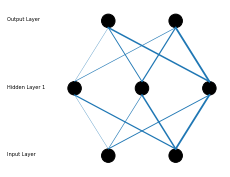

In [13]:
first_weight_matrix = np.array([[1, 2, -3],
                                [4, 5, -6]])
second_weight_matrix = np.array([[1, 2],
                                 [-3, 4],
                                 [5, -6]])

plt.figure(figsize=(3,3))
draw_MLP(layer_sizes=[2,3,2],
         weights=[first_weight_matrix, second_weight_matrix],
         inter_layer_dist=5,
         neuron_radius=0.5,
         text_distance=5)

### Part a

In [40]:
plt.rcParams["figure.dpi"]= 200

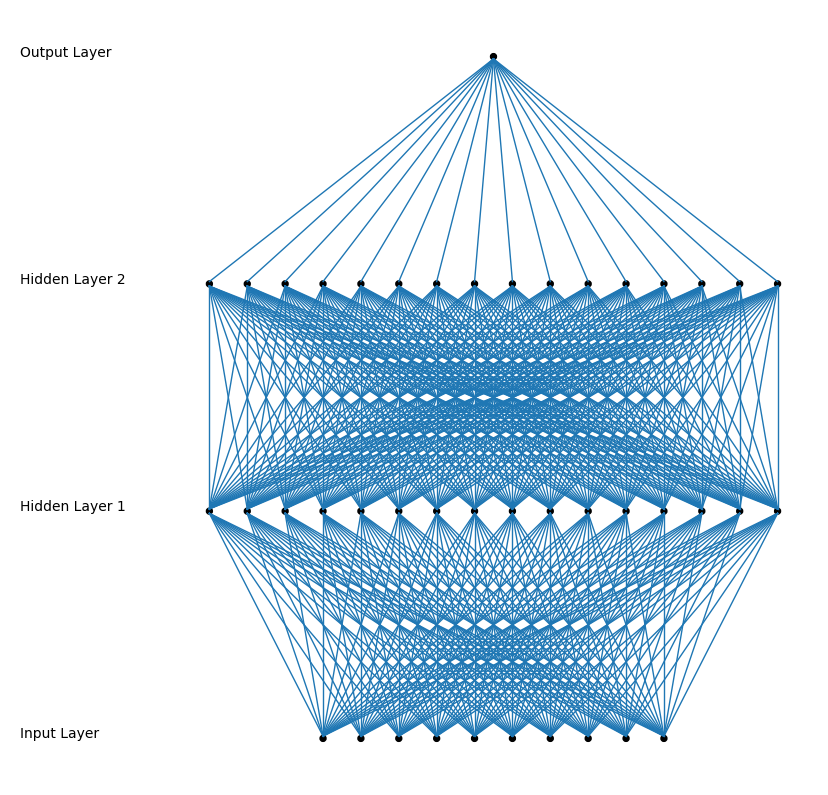

In [41]:
plt.figure(figsize=(5,5)) # tweak the size values here until it looks good on your own screen
draw_MLP(layer_sizes=[10, 16, 16, 1], weights=None)

### Part b

In [16]:
def parse_tf_weights(model, include_input_layer=True):
    """Get the layer-sizes and weights of a tf.keras.Model or tf.Module with fully-connected layers only.
    
    params:
        model -- the tf.keras.Model from which to get layer-sizes and weights
        include_input_layer -- boolean, default True, whether to include the input layer (in case it is really large and clutters the plot)
    returns:
        layer_sizes -- a list of ints of layer sizes
        weights -- a list of matrices of weights
    """
    layer_sizes = []
    weights = []

    model_weights_total = model.get_weights()

    for i in range(len(model_weights_total)):
      if (i == 0 and include_input_layer == True and len(model_weights_total[0].shape) == 2):
        weights.append(model_weights_total[0])
        layer_sizes.append(model_weights_total[0].shape[0])

      if (len(model_weights_total[i].shape) == 2 and i > 0):
        weights.append(model_weights_total[i])
      
      if (len(model_weights_total[i].shape) == 1):
        layer_sizes.append(model_weights_total[i].shape[0])
      
      #print(i, len(weights), len(layer_sizes))
    
    return layer_sizes, weights

In [17]:
layer_sizes, weights = parse_tf_weights(gt1_model1)

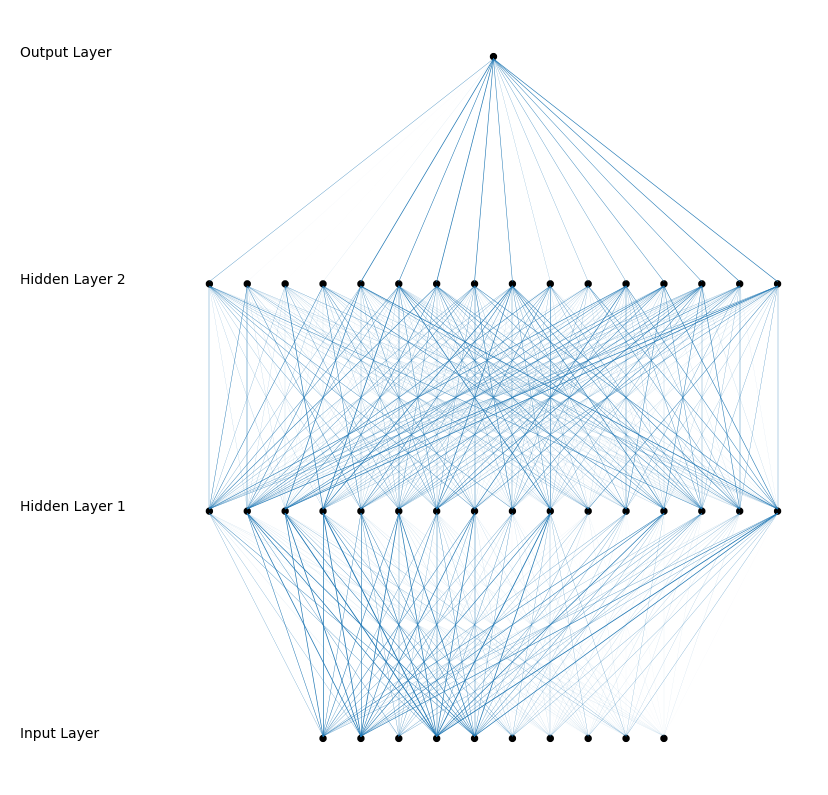

In [18]:
plt.figure(figsize=(5,5)) # tweak the size values here until it looks good on your own screen
draw_MLP(layer_sizes=layer_sizes, weights=weights)

In [19]:
np.array(gt1_model1.get_weights())[0].shape[0]

10

In [20]:
len(np.array(gt1_model1.get_weights())[1].shape)

1

In [21]:
np.array(gt1_model1.get_weights())[2].shape

(16, 16)

In [22]:
np.array(gt1_model1.get_weights())[3].shape

(16,)

In [23]:
np.array(gt1_model1.get_weights())[4].shape

(16, 1)

In [24]:
np.array(gt1_model1.get_weights())[5].shape

(1,)

### Section 5

### Part a

In [25]:
gt1_model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(1,10)),
  tf.keras.layers.Dense(1, activation = "linear")
])

In [26]:
gt1_model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), loss=tf.keras.losses.MSE)

In [27]:
gt1_model2.fit(gt1_X.reshape((len(gt1_X), 1, 10)), gt1_y, batch_size = 64, epochs=100, verbose=2)

Epoch 1/100
79/79 - 0s - loss: 162.7987 - 372ms/epoch - 5ms/step
Epoch 2/100
79/79 - 0s - loss: 127.1084 - 75ms/epoch - 949us/step
Epoch 3/100
79/79 - 0s - loss: 98.2299 - 82ms/epoch - 1ms/step
Epoch 4/100
79/79 - 0s - loss: 75.0238 - 81ms/epoch - 1ms/step
Epoch 5/100
79/79 - 0s - loss: 56.7642 - 81ms/epoch - 1ms/step
Epoch 6/100
79/79 - 0s - loss: 42.3826 - 81ms/epoch - 1ms/step
Epoch 7/100
79/79 - 0s - loss: 31.1821 - 91ms/epoch - 1ms/step
Epoch 8/100
79/79 - 0s - loss: 22.5615 - 100ms/epoch - 1ms/step
Epoch 9/100
79/79 - 0s - loss: 16.1130 - 85ms/epoch - 1ms/step
Epoch 10/100
79/79 - 0s - loss: 11.3442 - 95ms/epoch - 1ms/step
Epoch 11/100
79/79 - 0s - loss: 7.8742 - 76ms/epoch - 966us/step
Epoch 12/100
79/79 - 0s - loss: 5.3626 - 77ms/epoch - 980us/step
Epoch 13/100
79/79 - 0s - loss: 3.5793 - 85ms/epoch - 1ms/step
Epoch 14/100
79/79 - 0s - loss: 2.3640 - 83ms/epoch - 1ms/step
Epoch 15/100
79/79 - 0s - loss: 1.5337 - 87ms/epoch - 1ms/step
Epoch 16/100
79/79 - 0s - loss: 0.9727 - 78m

In [28]:
"""
The loss for the gt1_model2 model was on the order of 10^-7 times smaller than the loss of the gt1_model1 model. 
I didn't expect this because we made the model archiecture less complicated, but I think it makes sense because 
a regression-esque was what this data was designed for, not a neural network. 
"""

"\nThe loss for the gt1_model2 model was on the order of 10^-7 times smaller than the loss of the gt1_model1 model. \nI didn't expect this because we made the model archiecture less complicated, but I think it makes sense because \na regression-esque was what this data was designed for, not a neural network. \n"

### Part b

In [29]:
gt1_model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(1,10)),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation = "linear")
])

In [30]:
gt1_model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), loss=tf.keras.losses.MSE)

In [31]:
gt1_model3.fit(gt1_X.reshape((len(gt1_X), 1, 10)), gt1_y, batch_size = 64, epochs=100, verbose=2)

Epoch 1/100
79/79 - 0s - loss: 95.7859 - 409ms/epoch - 5ms/step
Epoch 2/100
79/79 - 0s - loss: 2.3338 - 95ms/epoch - 1ms/step
Epoch 3/100
79/79 - 0s - loss: 1.3467 - 85ms/epoch - 1ms/step
Epoch 4/100
79/79 - 0s - loss: 0.9299 - 102ms/epoch - 1ms/step
Epoch 5/100
79/79 - 0s - loss: 0.5669 - 115ms/epoch - 1ms/step
Epoch 6/100
79/79 - 0s - loss: 0.3132 - 91ms/epoch - 1ms/step
Epoch 7/100
79/79 - 0s - loss: 0.1835 - 87ms/epoch - 1ms/step
Epoch 8/100
79/79 - 0s - loss: 0.1249 - 99ms/epoch - 1ms/step
Epoch 9/100
79/79 - 0s - loss: 0.0919 - 86ms/epoch - 1ms/step
Epoch 10/100
79/79 - 0s - loss: 0.0694 - 88ms/epoch - 1ms/step
Epoch 11/100
79/79 - 0s - loss: 0.0542 - 92ms/epoch - 1ms/step
Epoch 12/100
79/79 - 0s - loss: 0.0428 - 88ms/epoch - 1ms/step
Epoch 13/100
79/79 - 0s - loss: 0.0326 - 95ms/epoch - 1ms/step
Epoch 14/100
79/79 - 0s - loss: 0.0246 - 91ms/epoch - 1ms/step
Epoch 15/100
79/79 - 0s - loss: 0.0190 - 111ms/epoch - 1ms/step
Epoch 16/100
79/79 - 0s - loss: 0.0148 - 82ms/epoch - 1ms/s

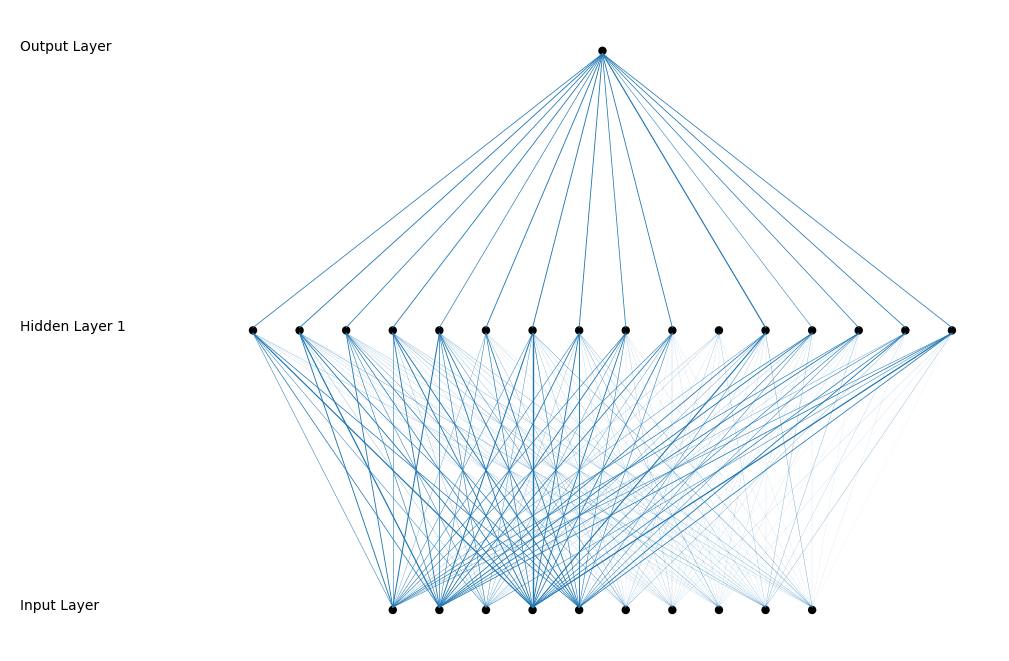

In [32]:
layer_sizes_3, weights_3 = parse_tf_weights(gt1_model3)
plt.figure(figsize=(5,5)) # tweak the size values here until it looks good on your own screen
draw_MLP(layer_sizes=layer_sizes_3, weights=weights_3)

In [33]:
"""
We made the model more complicated than gt1_model2, and its loss seemed to be higher than gt1_model3 (interesting). 
At the same time, this can be expected because a neural network is not designed to perform a regression task, but instead classification tasks.
We see that the outputs from x_6 to x_10 can be traced to the output, but their weights are insignficant in comparison to others. 
Changes in x_6 to x_10 will negligibly affect the model output, which makes sense. The coefficients of x_6 to x_10 are all 0, so the value of x_6 to x_10 should not matter. 
"""

'\nWe made the model more complicated than gt1_model2, and its loss seemed to be higher than gt1_model3 (interesting). \nAt the same time, this can be expected because a neural network is not designed to perform a regression task, but instead classification tasks.\nWe see that the outputs from x_6 to x_10 can be traced to the output, but their weights are insignficant in comparison to others. \nChanges in x_6 to x_10 will negligibly affect the model output, which makes sense. The coefficients of x_6 to x_10 are all 0, so the value of x_6 to x_10 should not matter. \n'

### Part c

In [34]:
a = gt1_X[0]

a2 = a
a2[5:] = a[5:] * 2

a100 = a
a100[5:] = a[:5] * 100

In [35]:
x6_x10_test_X = np.array([a, a2, a100])
x6_x10_test_y = np.array([gt1_y[0], gt1_y[0], gt1_y[0]])

In [36]:
gt1_model3.fit(x6_x10_test_X.reshape((len(x6_x10_test_X), 1, 10)), x6_x10_test_y, batch_size = 64, epochs=100, verbose=2)

Epoch 1/100
1/1 - 0s - loss: 0.2275 - 4ms/epoch - 4ms/step
Epoch 2/100
1/1 - 0s - loss: 17549.2871 - 2ms/epoch - 2ms/step
Epoch 3/100
1/1 - 0s - loss: 0.0942 - 4ms/epoch - 4ms/step
Epoch 4/100
1/1 - 0s - loss: 13591.6260 - 4ms/epoch - 4ms/step
Epoch 5/100
1/1 - 0s - loss: 11744.6982 - 5ms/epoch - 5ms/step
Epoch 6/100
1/1 - 0s - loss: 2036.3082 - 5ms/epoch - 5ms/step
Epoch 7/100
1/1 - 0s - loss: 970.9834 - 4ms/epoch - 4ms/step
Epoch 8/100
1/1 - 0s - loss: 6730.7183 - 4ms/epoch - 4ms/step
Epoch 9/100
1/1 - 0s - loss: 7683.0298 - 9ms/epoch - 9ms/step
Epoch 10/100
1/1 - 0s - loss: 3306.5127 - 7ms/epoch - 7ms/step
Epoch 11/100
1/1 - 0s - loss: 118.0995 - 4ms/epoch - 4ms/step
Epoch 12/100
1/1 - 0s - loss: 1102.6038 - 4ms/epoch - 4ms/step
Epoch 13/100
1/1 - 0s - loss: 3593.3381 - 6ms/epoch - 6ms/step
Epoch 14/100
1/1 - 0s - loss: 4041.1726 - 5ms/epoch - 5ms/step
Epoch 15/100
1/1 - 0s - loss: 2263.5200 - 5ms/epoch - 5ms/step
Epoch 16/100
1/1 - 0s - loss: 412.6484 - 5ms/epoch - 5ms/step
Epoch 1

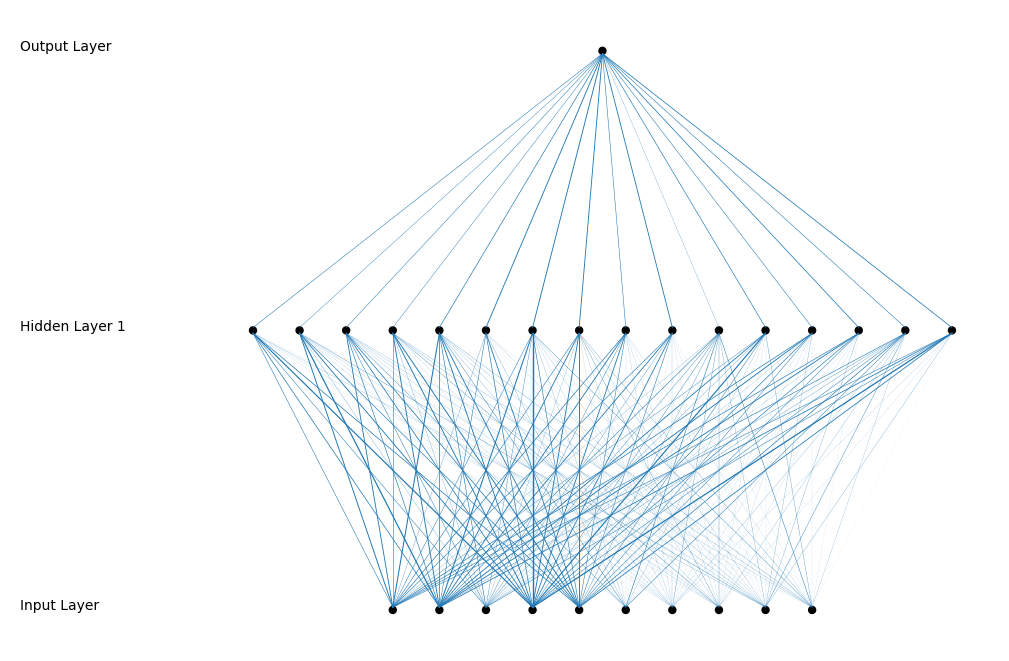

In [37]:
layer_sizes_3_2, weights_3_2 = parse_tf_weights(gt1_model3)
plt.figure(figsize=(5,5)) # tweak the size values here until it looks good on your own screen
draw_MLP(layer_sizes=layer_sizes_3_2, weights=weights_3_2)

In [38]:
"""
Loss is 10x worse, but that is marginal since the numbers are so small. Weights didn't change much at all, which is reassuring since they
shouldn't have. Amount is not signficant enough to change results?
"""

"\nLoss is 10x worse, but that is marginal since the numbers are so small. Weights didn't change much at all, which is reassuring since they\nshouldn't have. Amount is not signficant enough to change results?\n"

### Part d

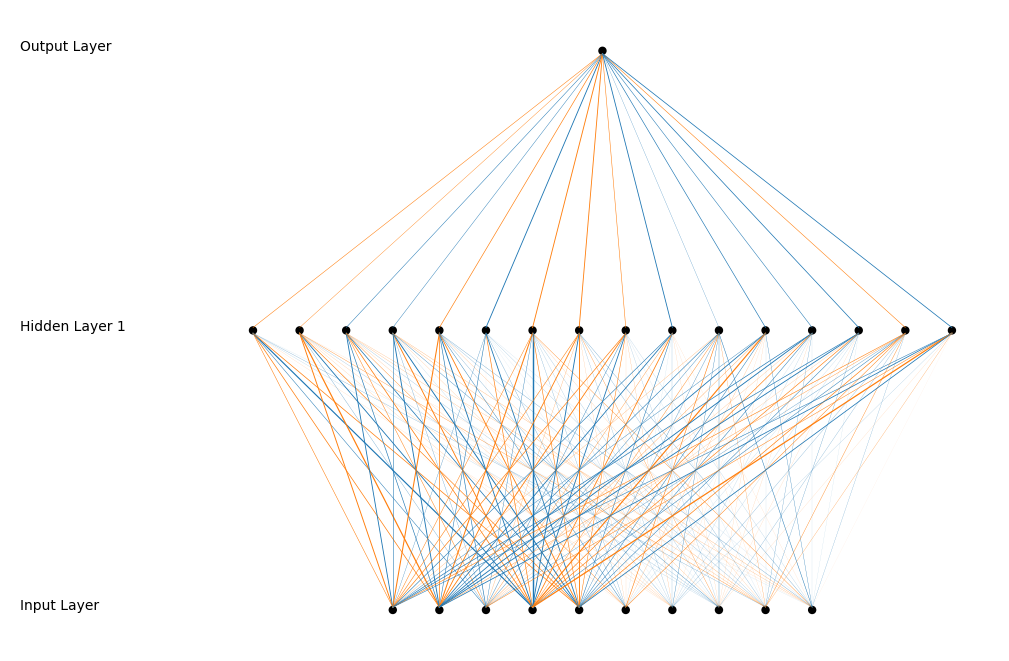

In [39]:
plt.figure(figsize=(5,5)) # tweak the size values here until it looks good on your own screen
draw_MLP(layer_sizes=layer_sizes_3_2, weights=weights_3_2, synapse_colors=['C0','C1'])